## <b>Tasks</b>
Open a new Jupyter notebook. In your notebook, load bank.csv into a Pandas dataframe. Follow the examples and process in Lab 2 - Data Preparation.ipynb to prepare bank.csv for machine learning.

Ensure that you have:

- encoded all categorical attributes as numerical,
- treated/filled in missing values
- applied scaler where necessary
- treated outliers appropriately
- created at least one new feature from the existing ones.

In the end, save the prepared dataset as a CSV file on your hard disk.

In [63]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import RobustScaler
import numpy as np



In [64]:
df = pd.read_csv("../bank.csv")

In [65]:
df.isna().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

In [66]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no


In [67]:
df_original = df

### Ordinal Categorical Attribute Encoding
Education is an ordinal categorical attribute with a clear hierarchy, we will define it below so the encoding follows the hierarchy. We also make sure we fill any empty rows with 3 as we see above it has 104 empty rows for education.

In [68]:
education_mapper = {
    "primary": 0,
    "secondary": 1,
    "tertiary": 2,
}

df["education"] = df["education"].replace(education_mapper).fillna(3).astype(int)

C:\Users\brian\AppData\Local\Temp\ipykernel_23440\1981555342.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["education"] = df["education"].replace(education_mapper).fillna(3).astype(int)


### One-hot Encoding
Now we will encode all other categorical attributes using one-hot encoding, this is converting them to numerical format with no clear order. Since job has empty rows we add the dummy_na=True attribute.

In [69]:
df = pd.get_dummies(df, columns=['job'], 
                     dummy_na=True, drop_first=True)

df.head()

,age,marital,education,default,balance,housing,loan,contact,day,month,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_nan
0,32.0,single,2,no,392,yes,no,cellular,1,apr,...,False,False,False,False,False,False,False,True,False,False
1,39.0,divorced,1,no,688,yes,yes,cellular,1,apr,...,False,False,False,False,False,False,False,True,False,False
2,59.0,married,1,no,1035,yes,yes,cellular,1,apr,...,False,False,False,True,False,False,False,False,False,False
3,47.0,married,1,no,398,yes,yes,cellular,1,apr,...,False,False,False,False,False,False,False,False,False,False
4,54.0,married,1,no,1004,yes,no,cellular,1,apr,...,False,False,False,True,False,False,False,False,False,False


In [70]:
df = pd.get_dummies(df, drop_first=True)

df.head()

,age,education,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,subscribed_yes
0,32.0,2,392,1,957,2,131,2,False,False,...,False,False,False,False,False,False,False,False,False,False
1,39.0,1,688,1,233,2,133,1,False,False,...,False,False,False,False,False,False,False,False,False,False
2,59.0,1,1035,1,126,2,239,1,False,False,...,False,False,False,False,False,False,False,False,False,False
3,47.0,1,398,1,274,1,238,2,True,False,...,False,False,False,False,False,False,False,False,False,False
4,54.0,1,1004,1,479,1,307,1,False,False,...,False,False,False,False,False,False,False,False,False,False


In [71]:
df.isna().sum()

age                  12
education             0
balance               0
day                   0
duration              0
campaign              0
pdays                 0
previous              0
job_blue-collar       0
job_entrepreneur      0
job_housemaid         0
job_management        0
job_retired           0
job_self-employed     0
job_services          0
job_student           0
job_technician        0
job_unemployed        0
job_nan               0
marital_married       0
marital_single        0
default_yes           0
housing_yes           0
loan_yes              0
contact_telephone     0
month_aug             0
month_dec             0
month_feb             0
month_jan             0
month_jul             0
month_jun             0
month_mar             0
month_may             0
month_nov             0
month_oct             0
month_sep             0
poutcome_other        0
poutcome_success      0
subscribed_yes        0
dtype: int64

We can see above we have 12 missing values for age, to combat this we will fill it replace the missing values with mean ages.

In [72]:
df['age'].fillna(df['age'].mean(), inplace=True)

C:\Users\brian\AppData\Local\Temp\ipykernel_23440\4255040007.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)


### Rescaling


In [73]:
robust_scaler = RobustScaler()

numerical_cols = ['balance', 'duration', 'campaign', 'previous']

df[numerical_cols] = robust_scaler.fit_transform(df[numerical_cols])

In [74]:
df['education'] = df['education'] / df['education'].max()  

### Treatment of Outliers

Lets look at some graphs of four columns which have big variations between each entry, this will allow us to spot outliers.

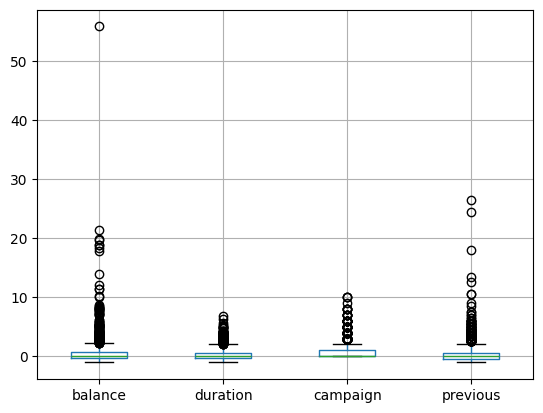

In [75]:
df.boxplot(column=['balance','duration', 'campaign', 'previous'])
plt.show()

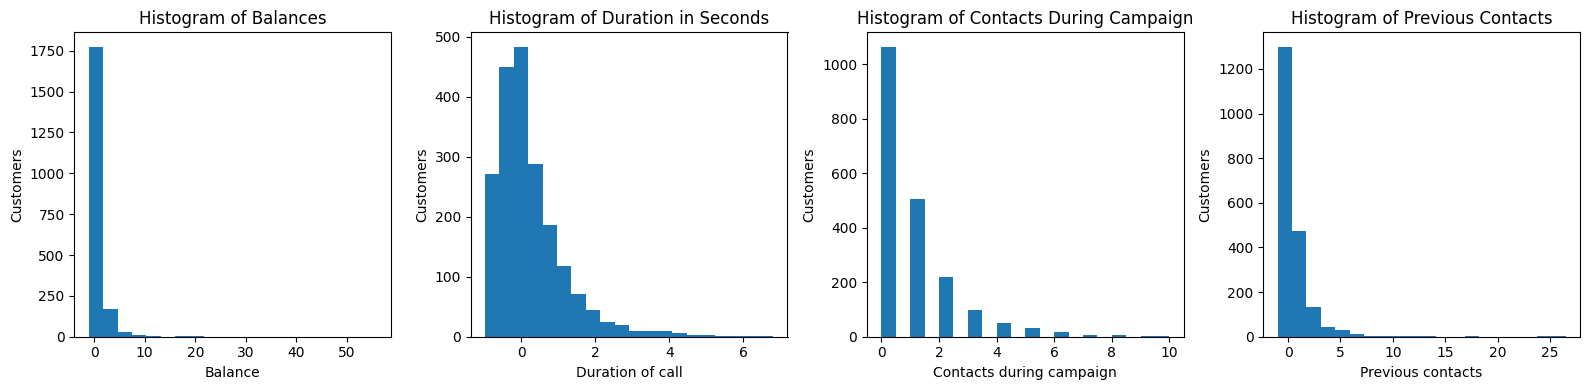

In [76]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4)) 

# Plot Balance
axes[0].set_title("Histogram of Balances")
axes[0].set_xlabel('Balance')
axes[0].set_ylabel('Customers')
axes[0].hist(df['balance'], bins=20)

# Plot Duration
axes[1].set_title("Histogram of Duration in Seconds")
axes[1].set_xlabel('Duration of call')
axes[1].set_ylabel('Customers')
axes[1].hist(df['duration'], bins=20)

# Plot Campaign
axes[2].set_title("Histogram of Contacts During Campaign")
axes[2].set_xlabel('Contacts during campaign')
axes[2].set_ylabel('Customers')
axes[2].hist(df['campaign'], bins=20)

# Plot Previous
axes[3].set_title("Histogram of Previous Contacts")
axes[3].set_xlabel('Previous contacts')
axes[3].set_ylabel('Customers')
axes[3].hist(df['previous'], bins=20)

plt.tight_layout()
plt.show()


In [77]:
df['balance'] = np.log(df['balance'] + abs(min(df['balance'])) + 1)
df['duration'] = np.log(df['duration'] + abs(min(df['duration'])) + 1)
df['campaign'] = np.log(df['campaign'] + abs(min(df['campaign'])) + 1)
df['previous'] = np.log(df['previous'] + abs(min(df['previous'])) + 1)

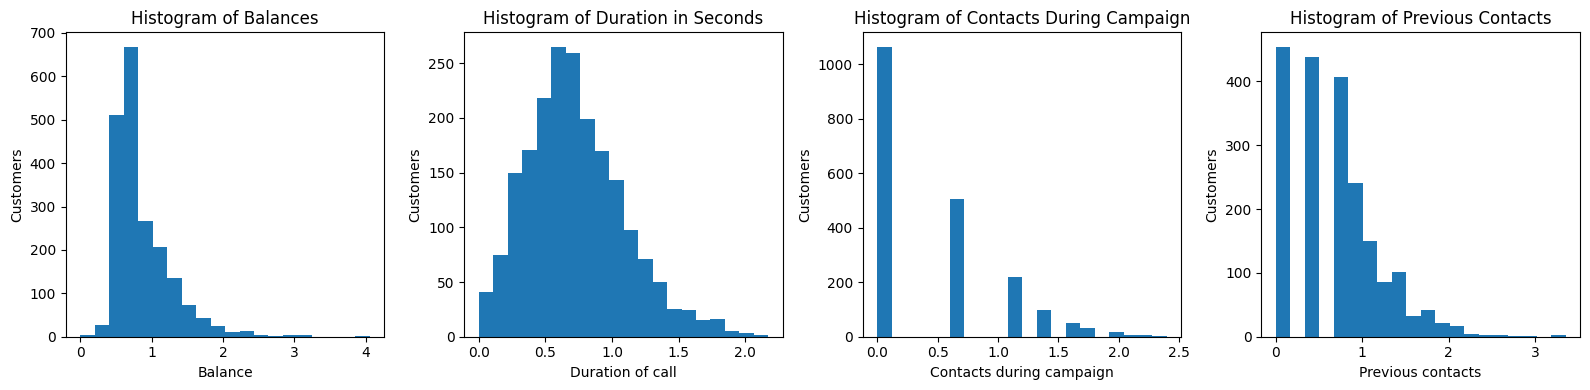

In [78]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4)) 

# Plot Balance
axes[0].set_title("Histogram of Balances")
axes[0].set_xlabel('Balance')
axes[0].set_ylabel('Customers')
axes[0].hist(df['balance'], bins=20)

# Plot Duration
axes[1].set_title("Histogram of Duration in Seconds")
axes[1].set_xlabel('Duration of call')
axes[1].set_ylabel('Customers')
axes[1].hist(df['duration'], bins=20)

# Plot Campaign
axes[2].set_title("Histogram of Contacts During Campaign")
axes[2].set_xlabel('Contacts during campaign')
axes[2].set_ylabel('Customers')
axes[2].hist(df['campaign'], bins=20)

# Plot Previous
axes[3].set_title("Histogram of Previous Contacts")
axes[3].set_xlabel('Previous contacts')
axes[3].set_ylabel('Customers')
axes[3].hist(df['previous'], bins=20)

plt.tight_layout()
plt.show()

### New Feature

We will combine contacts during campaign with contacts during previous campaigns into total contacts for a new feature.

In [79]:
df['total_contacts'] = df['campaign'] + df['previous']
df[['total_contacts']] = robust_scaler.fit_transform(df[['total_contacts']])
df['total_contacts'] = np.log(df['total_contacts'] + abs(min(df['total_contacts'])) + 1)

We will drop previous only as we can derive it from campaign and total_contacts, and we chose to keep campaign due to its relevancy with the current campaign leading to a higher importance.

In [80]:

df.drop(['previous'], axis=1, inplace=True)

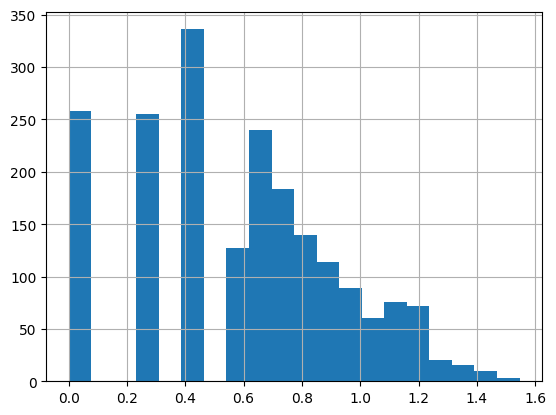

In [81]:
df['total_contacts'].hist(bins=20)
plt.show()

### Save Prepared Dataset

In [82]:
df.to_csv('bank_prepared.csv')